# Лабораторная работа 3
> Выполнена студентом: **Гусаровым А.С. 22ВВИм2**

Цель лабораторной работы:
1. Метрики качества.
2. Фильтрация изображений
3. Линейная фильтрация изображений в пространственной области.
4. Линейная фильтрация изображений в частотной области

## Фильтрация изображений в частотной области
### Импорт библиотек

In [2]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from utility import util

### Вспомогательные функции

In [3]:
# Функция для обработки изображения с FFT
def process_image(image, title, gs, plt_col):
    r = 50
    rows, cols = image.shape
    crow, ccol = np.uint32((rows / 2, cols / 2))
    
    # Создаем маску
    mask = np.zeros((rows, cols, 2), np.uint8)
    mask[crow - r:crow + r, ccol - r:ccol + r] = 1

    # Вычисляем Фурье-образ
    dft = cv.dft(np.float32(image), flags=cv.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    # Применяем маску и делаем обратное преобразование Фурье
    dft_shift_masked = dft_shift * mask
    f_ishift = np.fft.ifftshift(dft_shift_masked)
    img_back = cv.idft(f_ishift)
    img_back = cv.magnitude(img_back[..., 0], img_back[..., 1])

    magnitude_dft_shift = 20 * np.log(
        cv.magnitude(dft_shift[..., 0], dft_shift[..., 1]))
    with np.errstate(divide='ignore', invalid='ignore'):
        magnitude_dft_shift_masked = 20 * np.log(
            cv.magnitude(dft_shift_masked[..., 0], dft_shift_masked[..., 1]))

    # Исходное изображение
    plt.subplot(gs[0, plt_col]), plt.xticks([]), plt.yticks([])
    plt.title(title)
    plt.imshow(image, cmap='gray')

    # FFT Амплитудный спектр
    plt.subplot(gs[1, plt_col]), plt.xticks([]), plt.yticks([])
    plt.imshow(magnitude_dft_shift, cmap='gray')
    plt.title('Амплитудный спектр')

    # Восстановленное изображение
    plt.subplot(gs[2, plt_col]), plt.xticks([]), plt.yticks([])
    plt.imshow(img_back, cmap='gray')
    plt.title('Восстановленное')

    # Обрезанный спектр
    plt.subplot(gs[3, plt_col]), plt.xticks([]), plt.yticks([])
    plt.imshow(magnitude_dft_shift_masked, cmap='gray')
    plt.title('Обрезанный спектр')

# Функция для отображения нескольких изображений
def display_images(image_title_pairs):
    num_images = len(image_title_pairs)
    plt_rows = 4

    gs = plt.GridSpec(4, num_images)
    plt.figure(figsize=(14, 4 * plt_rows))

    for i, (image, title) in enumerate(image_title_pairs):
        plt_col = i % num_images
        process_image(image, title, gs, plt_col)
    plt.show()

### Фильтрация

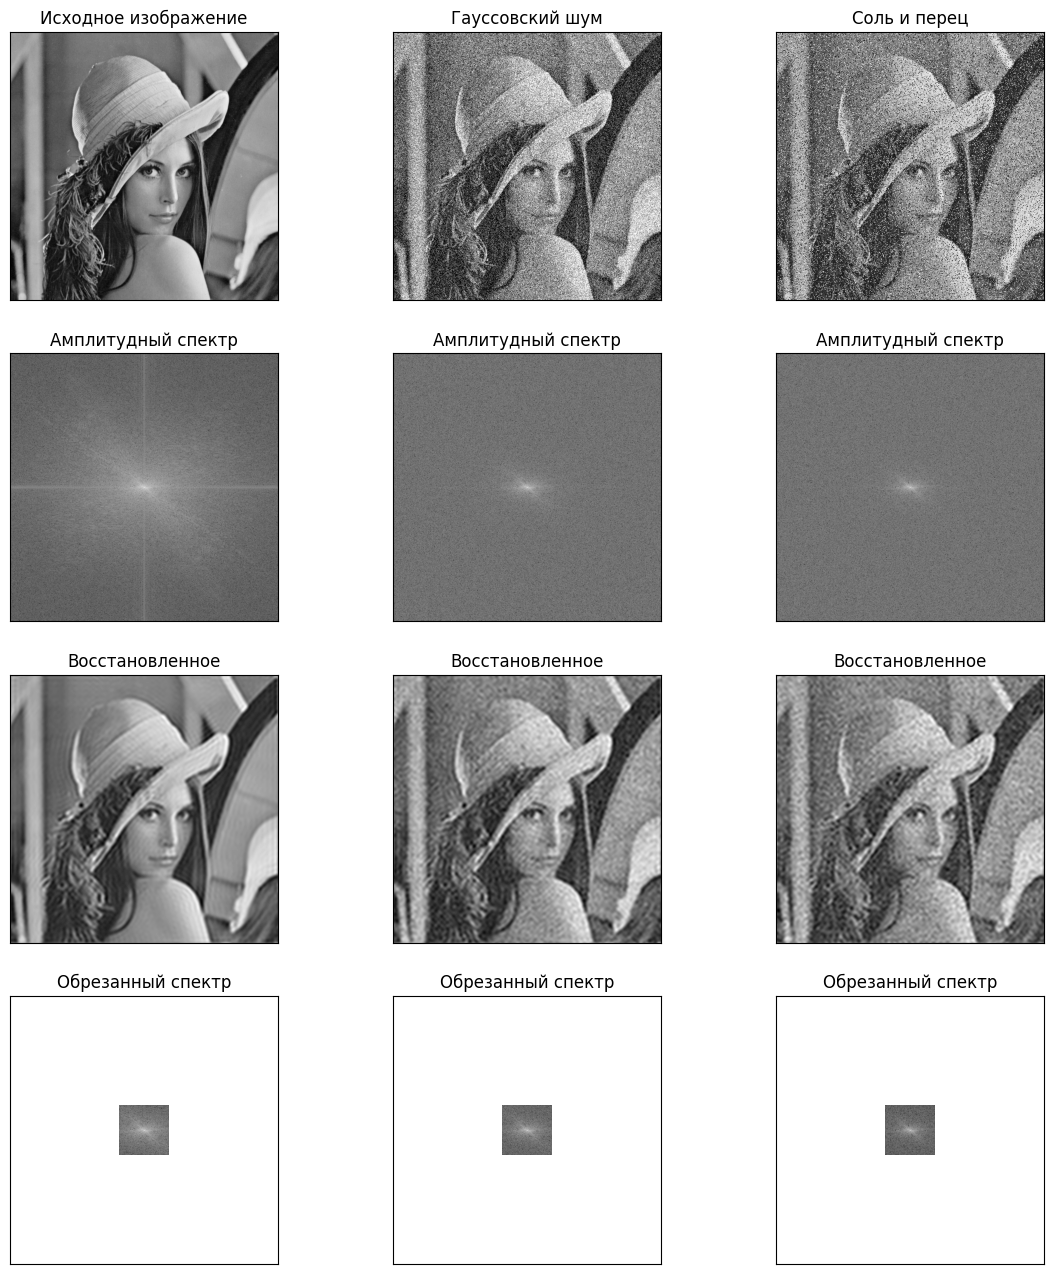

In [4]:
# Загрузка изображения
image = cv.imread('../images/lenna.png')
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Генерация изображений с разными типами шума
noisy_image = util.add_gauss_noise(gray_image, 0, 0.2)
sap_image = util.add_salt_and_pepper_noise(gray_image, 0.2)

# Определение и отображение изображений
image_title_pairs = [
    (gray_image, 'Исходное изображение'),
    (noisy_image, 'Гауссовский шум'),
    (sap_image, 'Соль и перец')
]

display_images(image_title_pairs)

## Индивидуальное задание. Восстановление изображения.

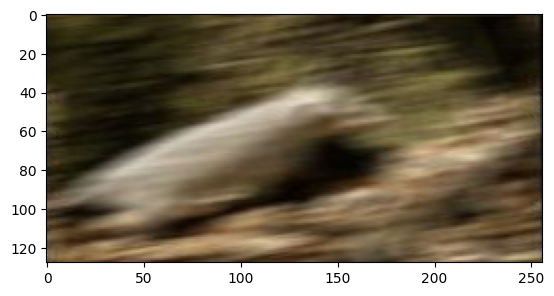

In [5]:
image_bad = cv.cvtColor(cv.imread('../images/bad_lab_3.jpg'), cv.COLOR_BGR2RGB)

x_warp = 65

src = np.array([[x_warp, 0], [image_bad.shape[1], 0], (image_bad.shape[1] - x_warp, image_bad.shape[0])], dtype='float32')
dst = np.array([[0, 0], [image_bad.shape[1], 0], (image_bad.shape[1], image_bad.shape[0])], dtype='float32')

transformation = cv.getAffineTransform(src, dst)
new_img = cv.warpAffine(image_bad, transformation, image_bad.shape[1::-1])

plt.imshow(new_img)

## Инверсия по одному каналу

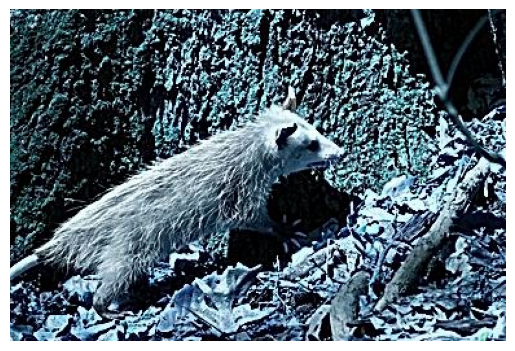

In [12]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt


image_bad2 = cv.imread('../images/bad_lab_3_1.jpg', cv.COLOR_BGR2GRAY)
lut = lambda i: 255 - i
invert_image = lut(image_bad2)
plt.axis('off')
plt.imshow(invert_image)

## Инверсия по трём каналам

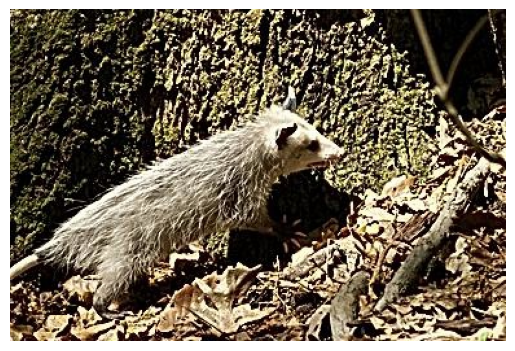

In [13]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_bad2 = cv.cvtColor(cv.imread('../images/bad_lab_3_1.jpg'), cv.COLOR_BGR2RGB)

lut = np.array([255 - i for i in range(256)], dtype=np.uint8)
invert_image = cv.LUT(image_bad2, lut)

plt.axis('off')
plt.imshow(invert_image)
plt.show()